<a href="https://colab.research.google.com/github/pachterlab/MBGBLHGP_2019/blob/master/notebooks/flank_analysis_normal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!date

Thu Jun 13 02:37:24 PDT 2019


In [1]:
!git clone https://github.com/pachterlab/MBGBLHGP_2019.git

Cloning into 'MBGBLHGP_2019'...
remote: Enumerating objects: 123, done.
remote: Counting objects: 100% (123/123), done.
remote: Compressing objects: 100% (116/116), done.
remote: Total 525 (delta 18), reused 103 (delta 7), pack-reused 402
Receiving objects: 100% (525/525), 795.79 MiB | 6.36 MiB/s, done.
Resolving deltas: 100% (166/166), done.
Checking out files: 100% (208/208), done.


In [3]:
!yes | pip install scanpy --quiet

In [4]:
!tar -xvf MBGBLHGP_2019/data/flank/filtered_feature_bc_matrix.tar.gz

filtered_feature_bc_matrix/
filtered_feature_bc_matrix/matrix.mtx.gz
filtered_feature_bc_matrix/features.tsv.gz
filtered_feature_bc_matrix/barcodes.tsv.gz


In [5]:
!gunzip MBGBLHGP_2019/data/flank/normal/*
!gunzip MBGBLHGP_2019/data/flank/splice/*

In [6]:
!cat MBGBLHGP_2019/data/flank/normal/genes.mtx.top MBGBLHGP_2019/data/flank/normal/genes.mtx.bot > MBGBLHGP_2019/data/flank/normal/genes.mtx
!cat MBGBLHGP_2019/data/flank/splice/genes.mtx.top MBGBLHGP_2019/data/flank/splice/genes.mtx.bot > MBGBLHGP_2019/data/flank/splice/genes.mtx

In [7]:
import scanpy as sc
from scipy import sparse, io
import matplotlib.pyplot as plt
import pandas as pd
%config InlineBackend.figure_format = 'retina'

In [9]:
c = sc.read_10x_mtx("filtered_feature_bc_matrix/")

In [10]:
k = sc.read_mtx("MBGBLHGP_2019/data/flank/normal/genes.mtx")

In [11]:
print(c)
print(k)

AnnData object with n_obs × n_vars = 11692 × 33538
    var: 'gene_ids', 'feature_types'
AnnData object with n_obs × n_vars = 1266268 × 33538


In [12]:
k_bcs = pd.read_csv("MBGBLHGP_2019/data/flank/normal/genes.barcodes.txt", header=None)
k_genes = pd.read_csv("MBGBLHGP_2019/data/flank/normal/genes.genes.txt", header=None)

In [13]:
k.obs.index = k_bcs[0].values
k.var.index = k_genes[0].values

## Filter k by barcodes in c

In [14]:
c.obs.index = c.obs.index.str.slice(0, 16)

In [15]:
c.var.index = c.var["gene_ids"]

In [16]:
k = k[k.obs.index.isin(c.obs.index)]
print(k)

View of AnnData object with n_obs × n_vars = 11692 × 33538


In [17]:
k = k[:,k.var.index.isin(c.var.index)]
print(k)

View of AnnData object with n_obs × n_vars = 11692 × 33538


In [18]:
c = c[:,c.var.index.isin(k.var.index)]

In [19]:
print(c)
print(k)

View of AnnData object with n_obs × n_vars = 11692 × 33538
    var: 'gene_ids', 'feature_types'
View of AnnData object with n_obs × n_vars = 11692 × 33538


In [20]:
safe_c = c.copy()
safe_k = k.copy()

In [21]:
c = safe_c.copy()
k = safe_k.copy()

# Scanpy Analysis

In [22]:
c.var_names_make_unique()
c.obs_names_make_unique()
sc.pp.filter_cells(c, min_genes=0)
sc.pp.filter_cells(c, min_counts=0)
sc.pp.filter_genes(c, min_cells=0)

k.var_names_make_unique()
k.obs_names_make_unique()
sc.pp.filter_cells(k, min_genes=0)
sc.pp.filter_cells(k, min_counts=0)
sc.pp.filter_genes(k, min_cells=0)

... storing 'feature_types' as categorical


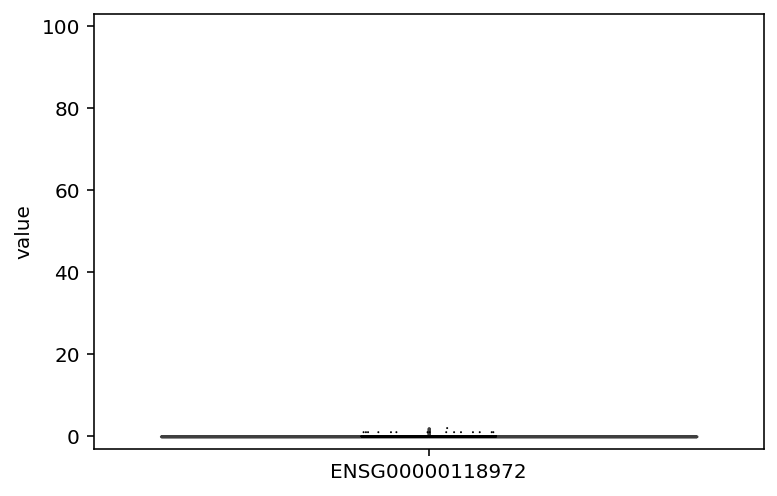

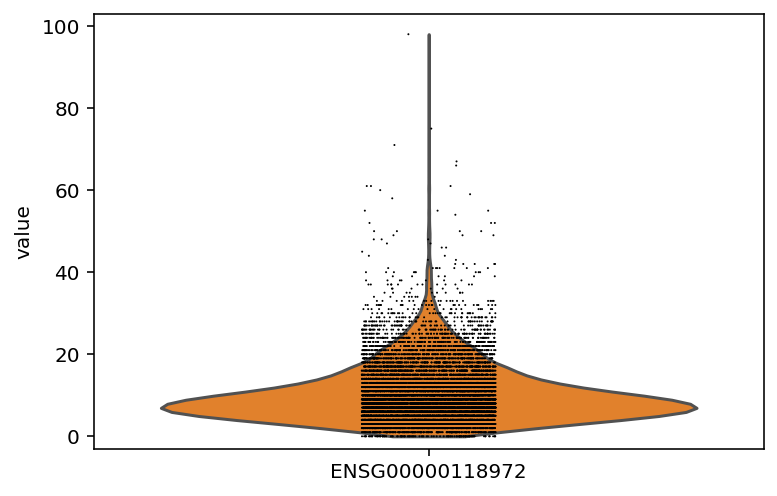

In [23]:
fig, ax = plt.subplots()
ax.set_ylim(-3, 103)
sc.pl.violin(c, keys='ENSG00000118972', color="#1F77B4", dpi=300, save="cellranger_gene.pdf", ax=ax)

fig, ax = plt.subplots()
ax.set_ylim(-3, 103)
sc.pl.violin(k, keys='ENSG00000118972', color="#FF7F0E", dpi=300, save="kallisto_regular_gene.pdf", ax=ax)